In [1]:
from pathlib import Path
import numpy as np
from PIL import Image
import glob

# Cropping the center

In [2]:
data_pth = Path('/home/rusl/Dropbox/BPHO Staff/USF/Segmented EM data from Lyndsey/FPNCT/')
save_pth = Path('/home/rusl/Dropbox/BPHO Staff/USF/Segmented EM data from Lyndsey/cropped_center')

In [3]:
def get_list(data_pth):
    file_list = list(data_pth.glob('*.jpg'))
    return file_list

def get_array(filename):
    im = Image.open(filename).convert('L')
    im_data = np.asarray(im)
    return im_data
    
def crop_center(im_data):
    # im_data is a np array
    h, w = im_data.shape
    x, y = int(h/16), int(w/16)
    crop_x = (w - x) // 2
    crop_y = (h - y) // 2    
    return im_data[crop_x:w-crop_x, crop_y:h-crop_y]

def save_img(cropped_data, img_pth):
    cropped = Image.fromarray(cropped_data)
    cropped.save(img_pth)

def crop_save_images(data_pth=data_pth, save_pth=save_pth):
    file_list = get_list(data_pth)
    for filename in file_list:
        im_data = get_array(filename)
        cropped_data = crop_center(im_data)
        save_img(cropped_data, img_pth=save_pth/filename.relative_to(data_pth))

# Gather all the crops

In [4]:
save_pth_all = Path('/home/rusl/Dropbox/BPHO Staff/USF/Segmented EM data from Lyndsey/cropped_all')

In [5]:
def crop_all(im_data):
    # im_data is a np array
    h, w = im_data.shape
    x, y = int(h/16), int(w/16)
    loc_x, loc_y = 0, 0
    i = 0
    for i in range(16):
        for j in range(16):
            yield im_data[loc_x:loc_x+x, loc_y:loc_y+y]
            i += 1
            loc_y += y
        loc_x += x
        loc_y = 0

def crop_save_all():
    file_list = get_list(data_pth)
    for filename in file_list:
        im_data = get_array(filename)
        cropped_data_generator = crop_all(im_data)
        for i in range(256):
            cropped_data = next(cropped_data_generator)
            img_name = str(filename)[:-4]+'_p'+str(i)+str(filename)[-4:]
            save_img(cropped_data, img_pth=save_pth_all/Path(img_name).relative_to(data_pth))

In [9]:
# for all 3 folders
pth_list = [Path('/home/rusl/Dropbox/BPHO Staff/USF/Segmented EM data from Lyndsey/FPNCT/'),
            Path('/home/rusl/Dropbox/BPHO Staff/USF/Segmented EM data from Lyndsey/FWNGV/')]
for pth in pth_list:
    data_pth = pth
    crop_save_all()

In [4]:
t_list = get_list(Path('/home/rusl/Dropbox/BPHO Staff/USF/Segmented EM data from Lyndsey/XRZCT/'))

In [7]:
get_array(t_list[0]).shape

(4084, 4084)

# Testing the result (img 155)

In [27]:
pieces_list = get_list(save_pth_all)
# the save_pth_all once only had pieces of img 155. now it has an awful lot

def get_index(path):
    name = str(path)
    index = int(name[87:-4])
    row = index // 16
    col = index % 16
    return row, col

d = dict()
for path in pieces_list:
    d[get_index(path)] = get_array(path)

pairs = sorted(d.items())
output = pairs[:16]
matrix = np.concatenate([k[1] for k in output], axis=1)
for i in range(2, 17):
    output = np.concatenate([k[1] for k in pairs[(i-1)*16 : i*16]], axis=1)
    matrix = np.concatenate([matrix, output])

In [56]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(1,2) # create visualizations
axarr[0].imshow(im_data, cmap=plt.cm.gray) # visualize image tensor
axarr[1].imshow(matrix, cmap=plt.cm.gray) # visualize original image file
plt.show() # show visualization

# Testing random

In [99]:
pieces_list = list(save_pth_all.glob('*.135.*.jpg'))
# the save_pth_all once only had pieces of img 155. now it has an awful lot

def get_index(path):
    name = str(path)
    index = int(name[87:-4])
    row = index // 16
    col = index % 16
    return row, col

d = dict()
for path in pieces_list:
    d[get_index(path)] = get_array(path)

pairs = sorted(d.items())
output = pairs[:16]
matrix = np.concatenate([k[1] for k in output], axis=1)
for i in range(2, 17):
    output = np.concatenate([k[1] for k in pairs[(i-1)*16 : i*16]], axis=1)
    matrix = np.concatenate([matrix, output])

In [102]:
im_data = get_array(Path('/home/rusl/Dropbox/BPHO Staff/USF/Segmented EM data from Lyndsey/FPNCT/FPNCT.135.jpg'))

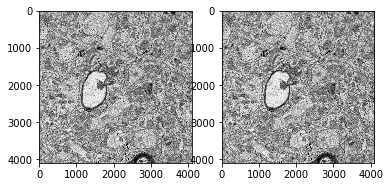

In [103]:
f, axarr = plt.subplots(1,2) # create visualizations
axarr[0].imshow(im_data, cmap=plt.cm.gray) # visualize image tensor
axarr[1].imshow(matrix, cmap=plt.cm.gray) # visualize original image file
plt.show() # show visualization